In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/g_90.txt',sep='\t ',header=None,engine='python')
# data.head()

In [3]:
selected_data = data[(data[0] >= 0.1) & (data[0] <= 10)]
selected_data.head()

,0,1,2,3,4
79,0.1024,0.038211,0.0,0.0,0.0
80,0.1152,0.037004,0.0,0.0,0.0
81,0.1280,0.034968,0.0,0.0,0.0
82,0.1408,0.034218,0.0,0.0,0.0
83,0.1536,0.032900,0.0,0.0,0.0


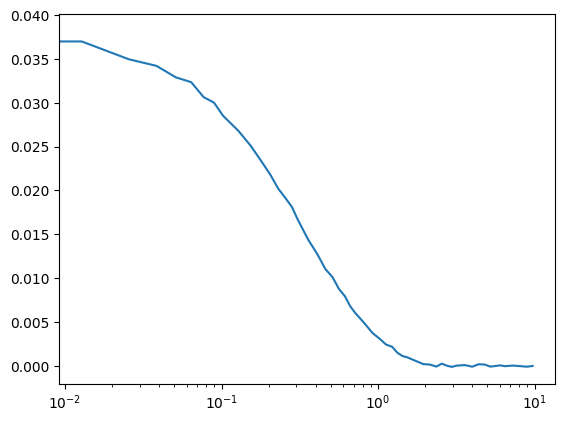

In [4]:
x = selected_data[0]
y = selected_data[1]

y = np.array(y)
x = np.array(x)
x = x - min(x)


plt.plot(x,y)
plt.xscale('log')
# plt.xlim(0.01,10)
# plt.ylim(0,0.1)
plt.show()

In [5]:
import plotly.express as px 
import plotly.graph_objects as go 
import numpy as np 
fig = go.Figure()

# fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='data'))

fig.update_layout(
	# xaxis_type="log",
	xaxis_title="x-axis in logarithmic scale",
	yaxis_title="y-axis",
	xaxis=dict(range=[0, 10]),
	yaxis=dict(range=[0, 0.06])
)

fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='data',error_y=dict( 
		type='constant', 
		value=0.001, 
		color='green', 
		thickness=1.5, 
		width=3, 
	)))

fig.show()


In [9]:
from labbiofisica import Interpolazione

def f (x, a, b, γ):
    return a*np.exp(-γ*x)+b

simgaY = np.float64(0.001)
m = Interpolazione(x,y,simgaY,f,guess=[0.04,-0.001,2.7],names=['A','B','γ'])
print(m)



----------------- VALORI FIT: -----------------
A: (3.764 ± 0.044)e-2 
B: (1.082 ± 2.096)e-4 
γ: 2.634 ± 0.076 

dof: 50
chi2: 3.33
chi2 ridotto: 0.07
pvalue: 1.0
------------------------------------------------



In [13]:

X,Y = m.draw()

# plt.plot(X,Y)
# plt.xlim(0,1)
# plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y, mode='lines', name='model'))

fig.update_layout(
	xaxis_type="log",
	xaxis_title="x-axis in logarithmic scale",
	yaxis_title="y-axis",
	# xaxis=dict(range=[np.log10(0), np.log10(10)]),
	yaxis=dict(range=[0, 0.06])
)

fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='data'))


fig.show()